In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
import shap
import matplotlib.pyplot as plt

def load_and_prepare_data(file_path):
    # 加载数据
    df = pd.read_excel(file_path)
    X = df.iloc[:, 1:]
    y = df.iloc[:, 0]
    return X, y

def train_and_analyze(X, y, n_iterations=20):
    feature_names = X.columns
    all_shap_values = []
    all_test_scores = []
    all_raw_shap_values = []
    all_feature_values = []
    
    # 训练并分析多个迭代结果
    for i in range(n_iterations):
        random_state = i
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state)

        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)
        X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

        rf_model = Ridge(alpha=0.1)
        rf_model.fit(X_train_scaled, y_train)

        test_score = rf_model.score(X_test_scaled, y_test)
        all_test_scores.append(test_score)

        # 计算SHAP值
        explainer = shap.LinearExplainer(model=rf_model, masker=shap.maskers.Partition(X_train_scaled))
        shap_values = explainer.shap_values(X_train_scaled)
        all_shap_values.append(shap_values)

        all_raw_shap_values.append(shap_values)
        all_feature_values.append(X_train_scaled)
        
        print(f"{test_score:.4f}")
    
    return all_shap_values, all_raw_shap_values, all_feature_values, all_test_scores, feature_names

def save_detailed_shap_results(feature_names, all_raw_shap_values, all_feature_values, all_test_scores):
    feature_importances = []
    feature_stds = []
    
    # 计算特征重要性和标准差
    for feature_idx in range(len(feature_names)):
        feature_shap_values = []
        for iteration_shap in all_raw_shap_values:
            feature_importance = np.mean(np.abs(iteration_shap[:, feature_idx]))
            feature_shap_values.append(feature_importance)
        
        feature_importances.append(np.mean(feature_shap_values))
        feature_stds.append(np.std(feature_shap_values))

    # 创建DataFrame并按平均SHAP值排序
    importance_df = pd.DataFrame({
        'feature_names': feature_names,
        'Average Mean SHAP Value': feature_importances,
        'feature_stds': feature_stds
    })
    importance_df = importance_df.sort_values('Average Mean SHAP Value', ascending=False)

    # 保存结果到Excel
    with pd.ExcelWriter('detailed_shap_analysis.xlsx', engine='openpyxl') as writer:
        importance_df.to_excel(writer, sheet_name='feature_importances', index=False)
        writer.sheets['feature_importances'].sheet_state = 'visible'  # 确保工作表可见
        
        # 保存每次迭代的SHAP值
        for i, (shap_values, feature_values) in enumerate(zip(all_raw_shap_values, all_feature_values)):
            shap_df = pd.DataFrame(shap_values, columns=feature_names)
            stats_df = pd.DataFrame({
                'feature_names': feature_names,
                'mean': shap_df.mean(),
                'std': shap_df.std(),
                'min': shap_df.min(),
                'max': shap_df.max(),
                '0.25': shap_df.quantile(0.25),
                '0.5': shap_df.median(),
                '0.75': shap_df.quantile(0.75)
            })
            stats_df.to_excel(writer, sheet_name=f'{i+1}', index=False)
        
        # 保存模型性能
        scores_df = pd.DataFrame({
            'time': range(len(all_test_scores)),
            'R²': all_test_scores
        })
        scores_df.to_excel(writer, sheet_name='model performance', index=False)
        
        # 汇总统计信息
        summary_df = pd.DataFrame({
            'indicator': ['Mean R²', 'R² std'],
            'value': [np.mean(all_test_scores), np.std(all_test_scores)]
        })
        summary_df.to_excel(writer, sheet_name='collect', index=False)
    
    return feature_importances, feature_stds

# 文件路径
file_path = 'data_final.xlsx'

# 加载和准备数据
X, y = load_and_prepare_data(file_path)

# 训练并分析
all_shap_values, all_raw_shap_values, all_feature_values, all_test_scores, feature_names = train_and_analyze(X, y)

# 打印R²均值和标准差
mean_score = np.mean(all_test_scores)
std_score = np.std(all_test_scores)
print(f"{mean_score:.4f} ± {std_score:.4f}")

# 保存详细的SHAP分析结果
feature_importances, feature_stds = save_detailed_shap_results(feature_names, all_raw_shap_values, 
                                                             all_feature_values, all_test_scores)


0.9780
0.9806
0.9784
0.9763
0.9791
0.9720
0.9687
0.9759
0.9650
0.9753
0.9751
0.9560
0.9716
0.9753
0.9784
0.9672
0.9605
0.9569
0.9784
0.9729
0.9721 ± 0.0072


In [3]:
import matplotlib
from matplotlib.ticker import MultipleLocator, FormatStrFormatter


large=12
med=9
small=6
ss=10
sss=8
ssss=6


matplotlib.rcParams['figure.figsize']=(3.2,2.8)
matplotlib.rcParams['figure.dpi'] = 600

matplotlib.rcParams['font.sans-serif'] = ['Arial']   
matplotlib.rcParams['font.family']='sans-serif'
matplotlib.rcParams['font.style']='normal'   # normal (or roman), italic or oblique
matplotlib.rcParams['font.weight']='bold'   # normal bold bolder lighter, 100, 200, 300, ..., 900
matplotlib.rcParams["axes.labelweight"] = "bold"

matplotlib.rcParams['axes.titlesize'] =ss
#matplotlib.rcParams['axes.titlepad'] =-0.5
matplotlib.rcParams['legend.fontsize'] =ss
matplotlib.rcParams['axes.labelsize'] =ss
matplotlib.rcParams['xtick.labelsize'] =ss
matplotlib.rcParams['ytick.labelsize'] = ss
matplotlib.rcParams['figure.titlesize'] =sss


matplotlib.rcParams['xtick.major.width'] = 0.6
matplotlib.rcParams['ytick.major.width'] = 0.6

matplotlib.rcParams['xtick.major.size'] = 1.3
matplotlib.rcParams['ytick.major.size'] = 1.3

matplotlib.rcParams['xtick.major.pad'] = 1.5
matplotlib.rcParams['ytick.major.pad'] = 1.5

matplotlib.rcParams['axes.linewidth'] = 0.6

matplotlib.rcParams['lines.linewidth'] = 1.0
#matplotlib.rcParams['lines.markersize'] = 1.2

scatter_s=20

ref_line_color=['#4d4d4d', 'red']
ref_line_size=0.8

#matplotlib.rcParams['xtick.direction'] = 'in'

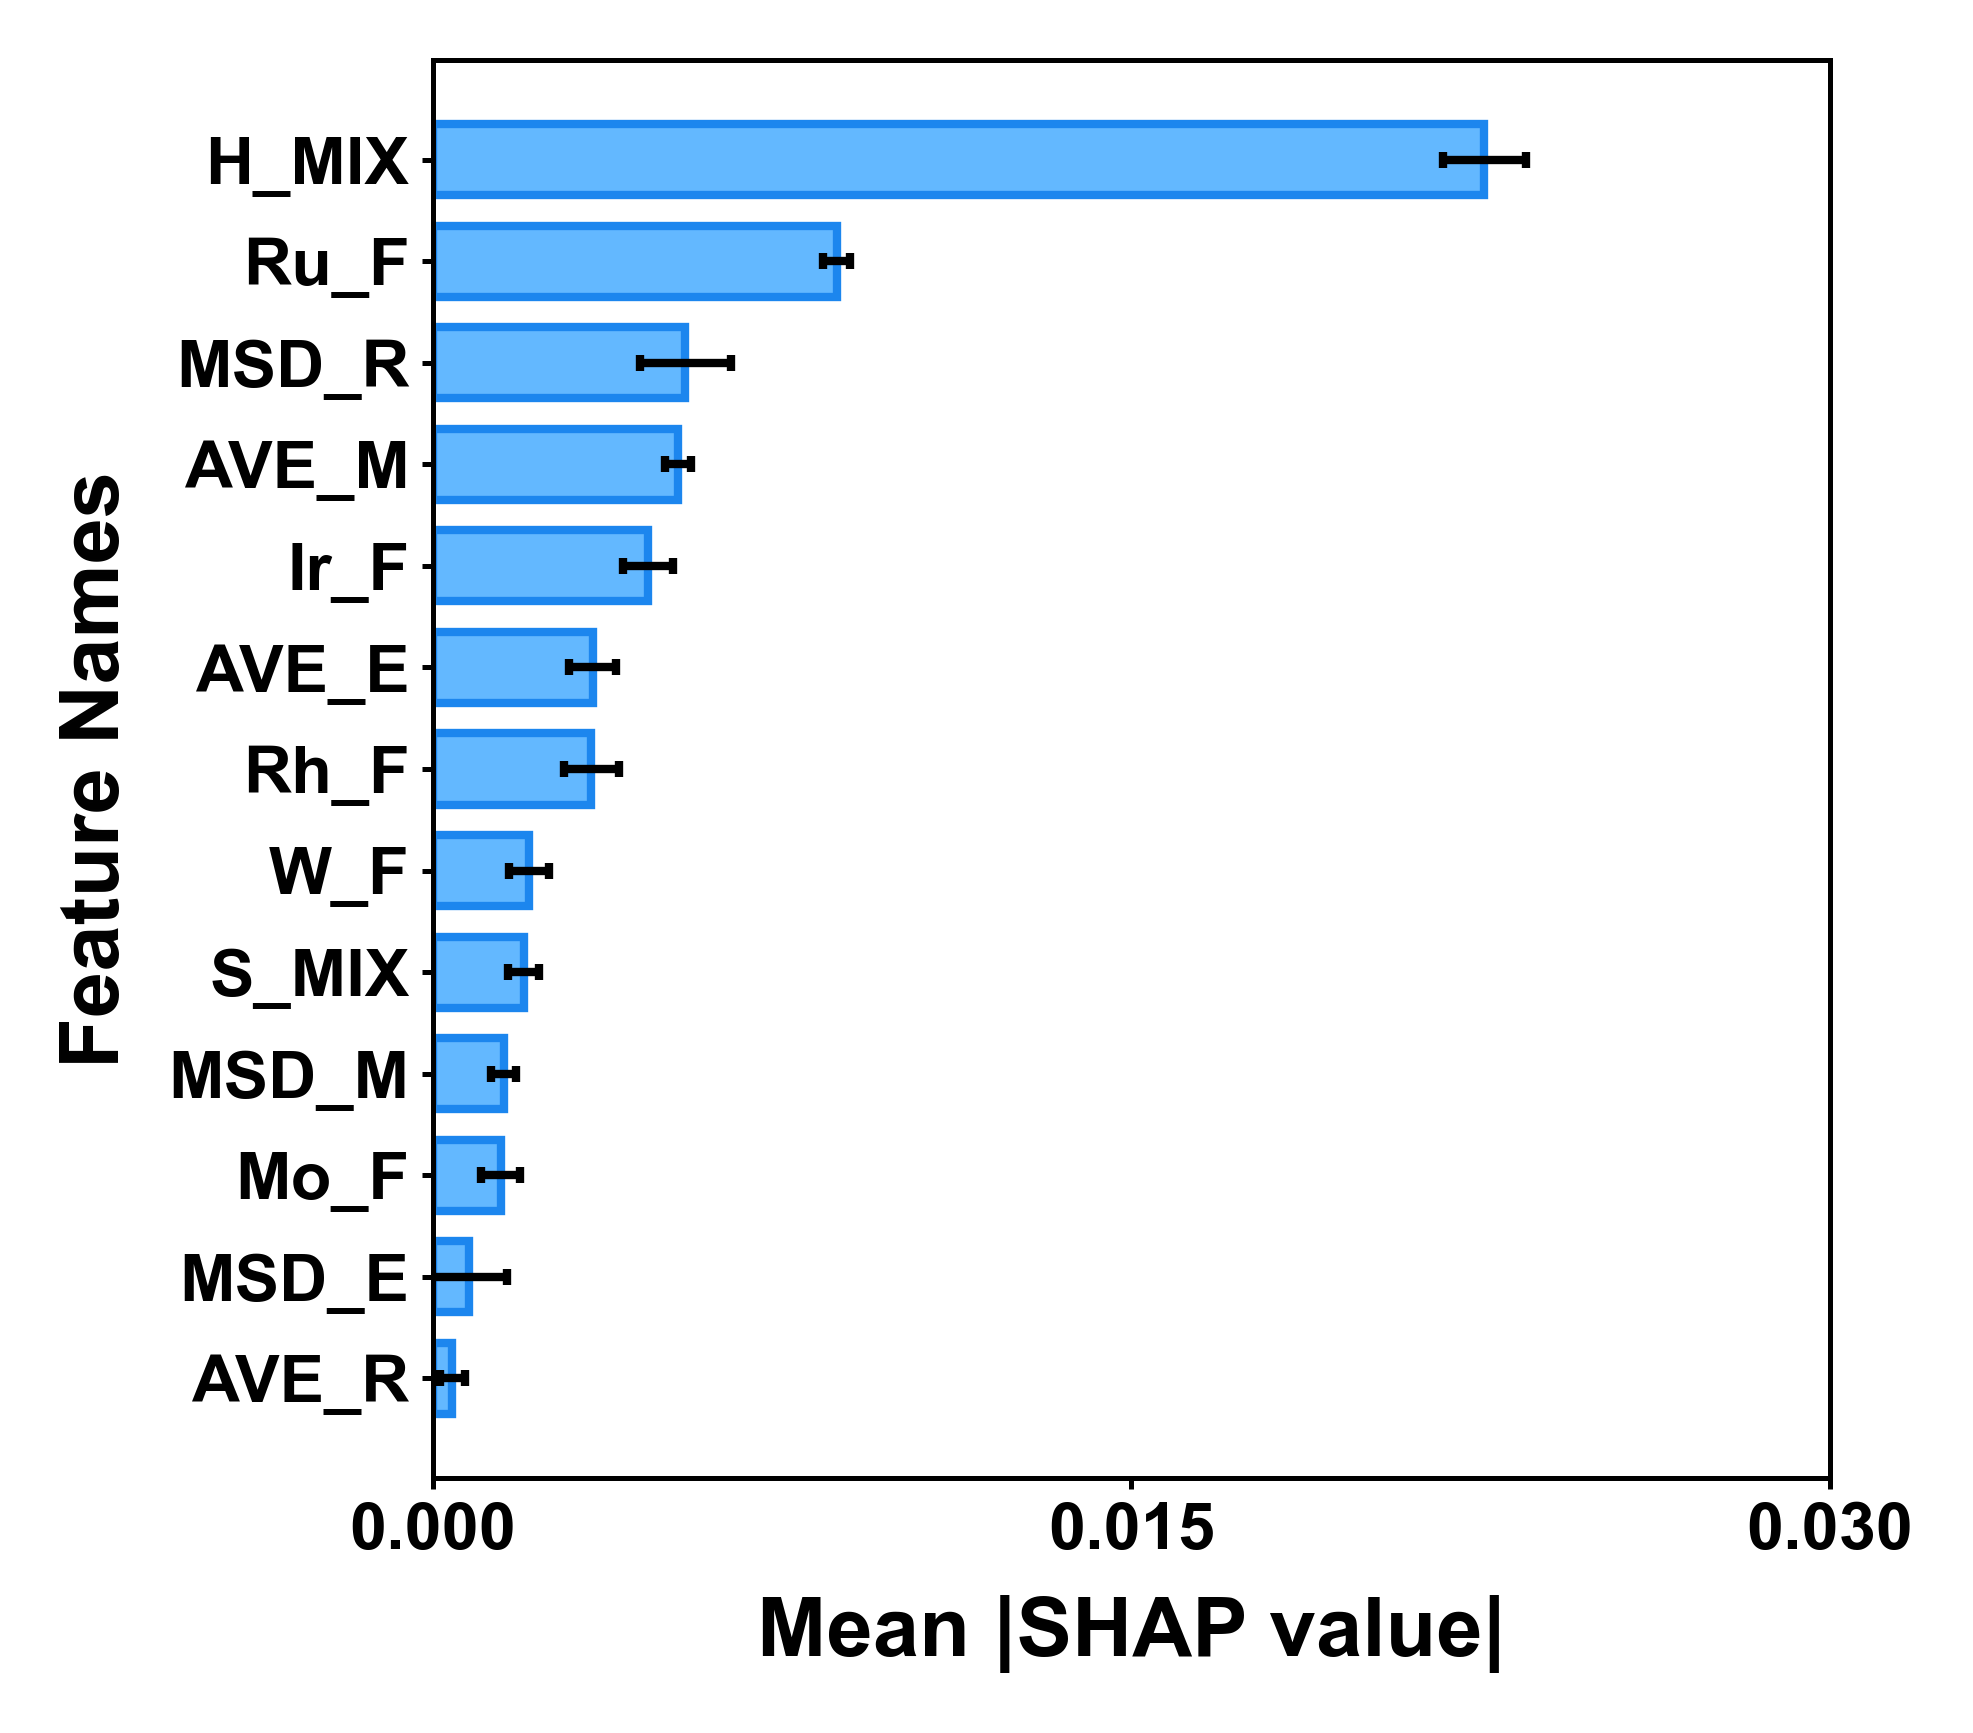

In [4]:
matplotlib.rcParams['ytick.labelsize'] = sss
matplotlib.rcParams['xtick.labelsize'] = sss


fig = plt.figure()

ax=fig.add_subplot(111)


sorted_idx = np.argsort(feature_importances)
y_pos = np.arange(len(feature_names))


ax.barh(y_pos, 
        [feature_importances[i] for i in sorted_idx],
        xerr=[feature_stds[i] for i in sorted_idx],
        #align='center',
        #alpha=0.8,
        #color='#87CEFA',
         color='#63B8FF',
         edgecolor='#1C86EE',
        #color='#1f77b4', 
        #ecolor='black',
          height=0.7, 
         linewidth=1,
        capsize=1.0)


plt.yticks(y_pos, [feature_names[i] for i in sorted_idx])
ax.set_xlabel('Mean |SHAP value|')
ax.set_ylabel('Feature Names')


ax.set_xlim([0,0.03])
ax.xaxis.set_ticks(np.linspace(0, 0.03, 3))



#xmajorLocator   = MultipleLocator(0.1) 
#ax.xaxis.set_major_locator(xmajorLocator)
#

#fig.tight_layout()
fig.tight_layout(pad=0.4, w_pad=1.0, h_pad=1.0)


plt.savefig('shap_importance_with_error_bars.pdf')
plt.show()

In [5]:
feature_importances

[0.0014596456782047843,
 0.008673872672721364,
 0.003405529039366368,
 0.0020752482351057535,
 0.004627571429145493,
 0.0004188669728197204,
 0.0034315529960444826,
 0.005268941431553247,
 0.005423381687260037,
 0.0007687528434452602,
 0.0015229401476638006,
 0.001951714703429043,
 0.022584288220927305]

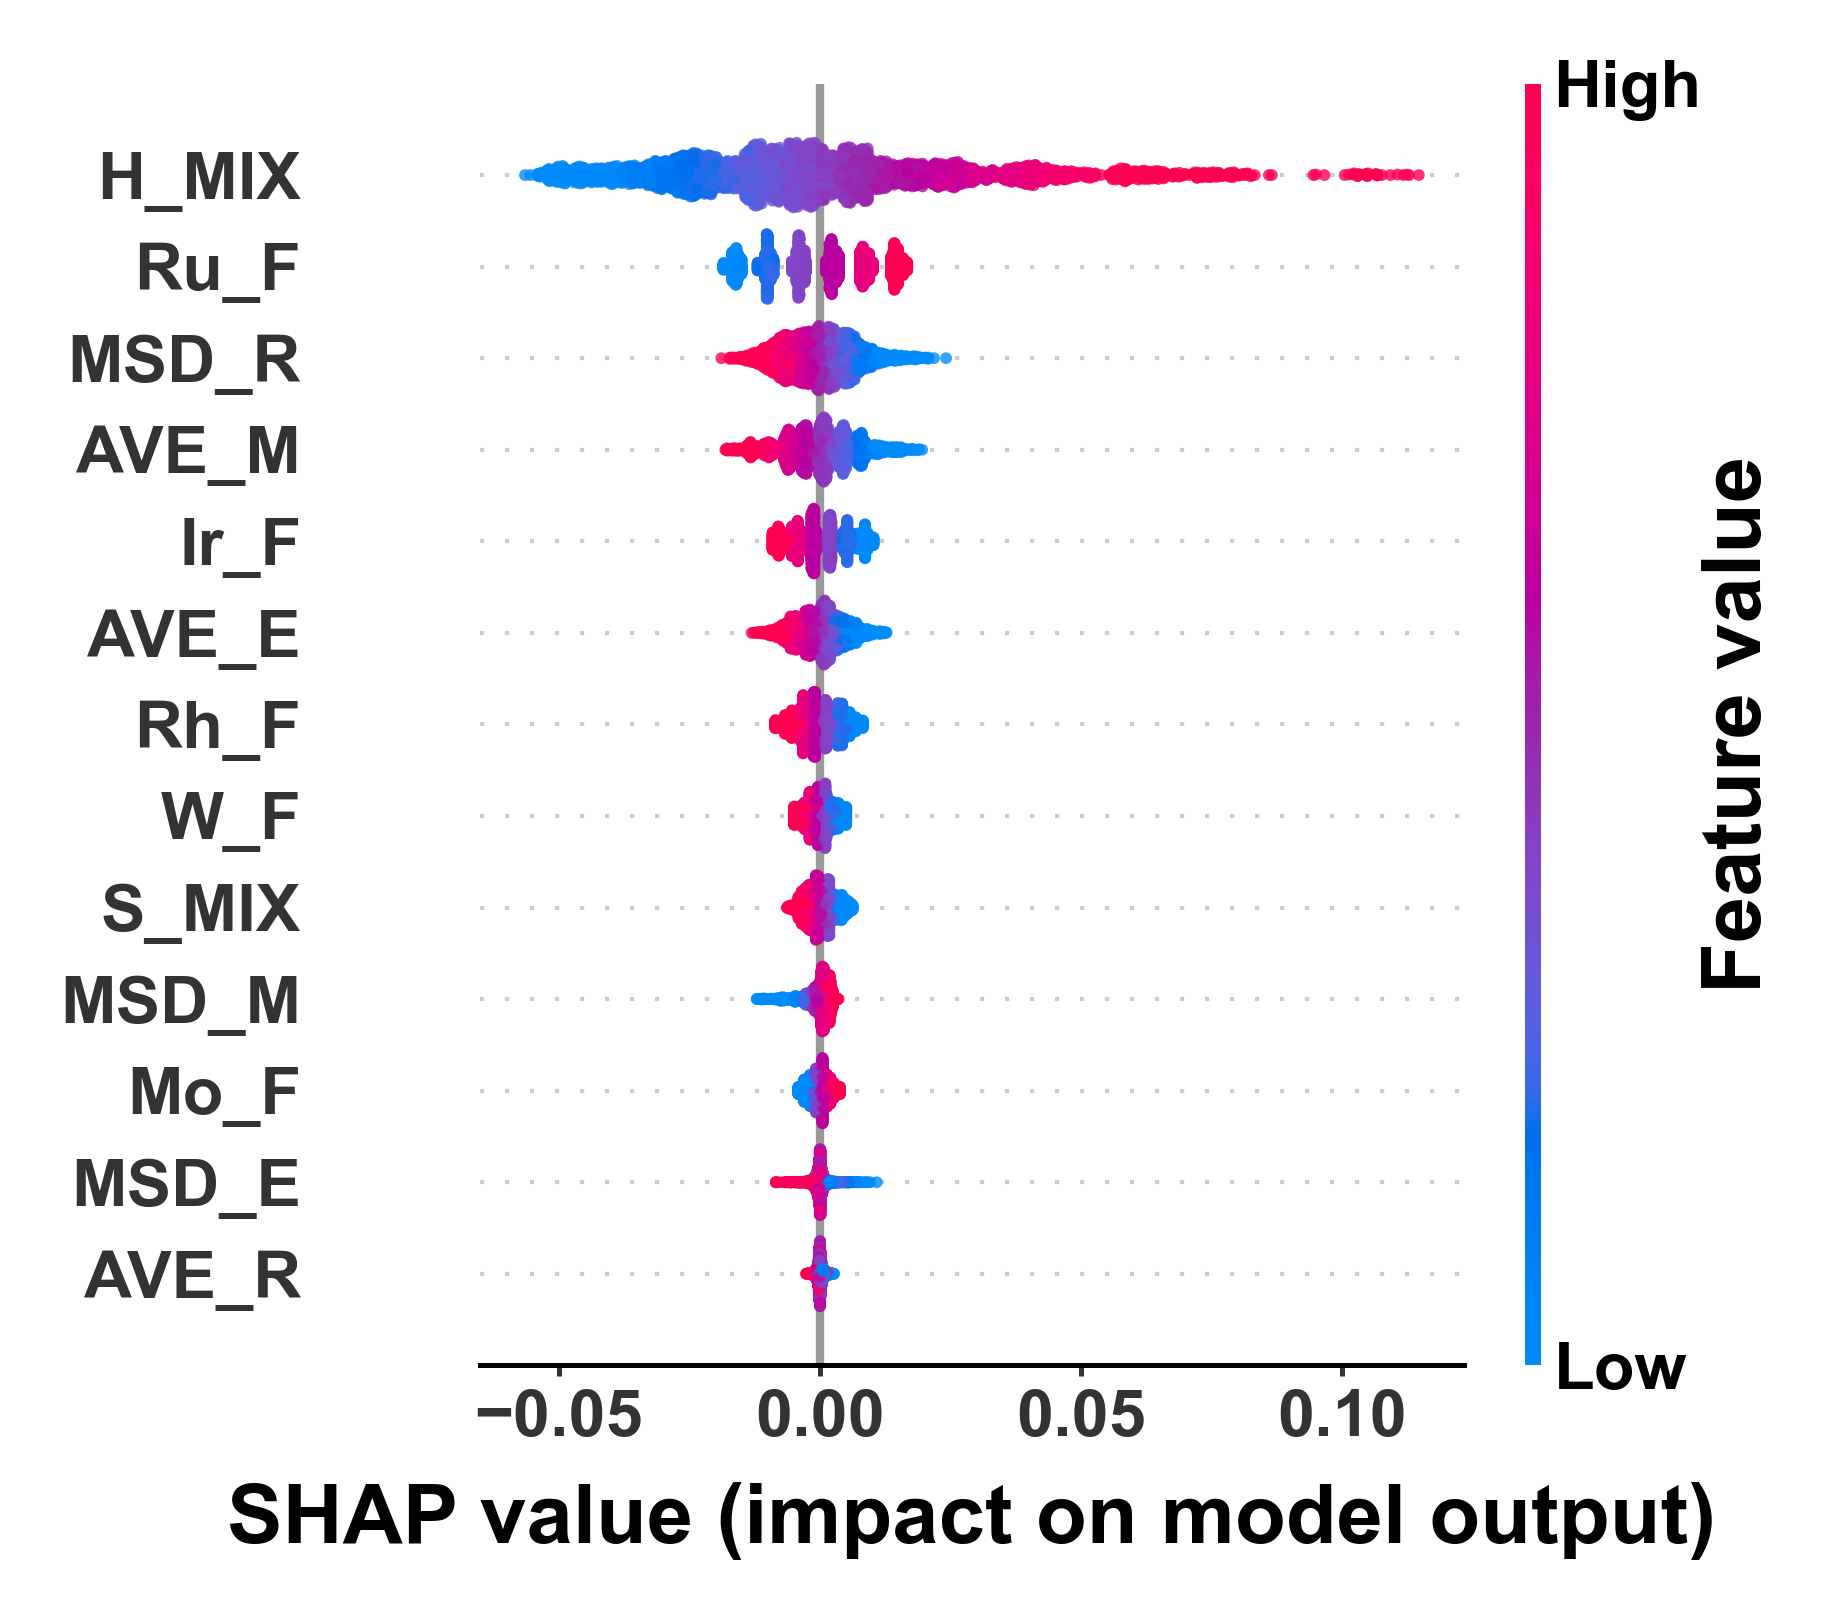

In [6]:
combined_shap_values = np.concatenate(all_raw_shap_values)
combined_features = pd.concat(all_feature_values)




plt.figure(figsize=(3.2,2.8))

shap.summary_plot(combined_shap_values, combined_features, 
                  show=False,
                 plot_size=None,
                  max_display=len(combined_features.columns),
                  alpha=0.8,
                plot_type="dot",
               
                 )


fontsize=8

fontsize_L=10

dot_size=2



ax = plt.gca()


for scatter in ax.collections:
    scatter.set_sizes([dot_size]*len(scatter.get_offsets()))


ax.tick_params(axis='y', labelsize=fontsize)


ax.tick_params(axis='x', labelsize=fontsize)
ax.set_xlabel('SHAP value (impact on model output)', fontsize=fontsize_L)


ax.set_yticklabels(ax.get_yticklabels(), fontsize=fontsize)


cbar = plt.gcf().axes[-1]
cbar.set_yticklabels(cbar.get_yticklabels(), fontsize=fontsize)
cbar.set_ylabel('Feature value', fontsize=fontsize_L)

#ax.tick_params(axis='y', pad=0.02)


plt.tight_layout()


#plt.subplots_adjust(left=0.00002)


plt.savefig('shap_distribution.pdf',bbox_inches='tight')
plt.show()